# 银行客户细分可视化及算法分析

* [pandas](https://pandas.pydata.org/) - to manipulate data frames
* [numpy](http://www.numpy.org/) - providing linear algebra
* [seaborm](https://seaborn.pydata.org/) - to create nice visualizations
* [matplotlib](https://matplotlib.org/) - basic tools for visualizations
* [scikit-learn](https://scikit-learn.org/stable/) - machine learning library

应用算法:

K-均值算法: [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


近邻传播聚类算法(AP聚类): [Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

一、读取数据

In [7]:
data = pd.read_csv("./german_credit_data.csv")

显示前20条数据：

In [8]:
data.head(20)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


首列可删除，其它列存在缺失值

In [9]:
data.drop(data.columns[0], inplace=True, axis=1)
print("客户数: {} 属性列数: {} ".format(data.shape[0],data.shape[1]))

print("缺失值:\n{}".format(data.isnull().sum()))

客户数: 1000 属性列数: 9 
缺失值:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [10]:
#唯一值
n_unique = data.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [12]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [13]:
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


**二、数据探索**


In [14]:
#定义散点图可视化方法
'''
sns.scatterplot()
x,y:输入的绘图数据，必须是数值型数据
hue:对输入数据进行分组的序列，使用不同颜色对各组的数据加以区分
size:对输入数据进行分组的序列，使用不同点尺寸对各组的数据加以区分。
style:对输入数据进行分组的序列，使用不同点标记对各组的数据加以区分。
data:pandas.DataFrame型参数，不能包含非数值型数据，否则会报错。
palette：在对数据进行分组时，设置不同组数据的显示颜色。hue参数使用的是默认的颜色，如果需要更多的颜色选项，
         则需要通过调色盘来设置，可以使用seaborn.color_palette()函数来设置颜色
hue_order:在使用hue参数对数据进行分组时，可以通过该参数设置数据组的显示顺序
'''
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

按性别可视化:

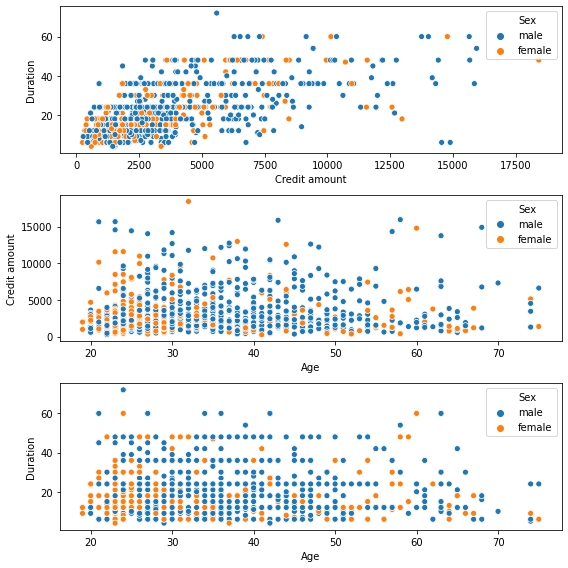

In [15]:
scatters(data, h="Sex")

总体印象是，女性往往比男性年轻，但是，最上面的图显示，在信贷的数量和期限方面，男女之间没有明显的区别。 
信用期限和信用额之间似乎存在正相关


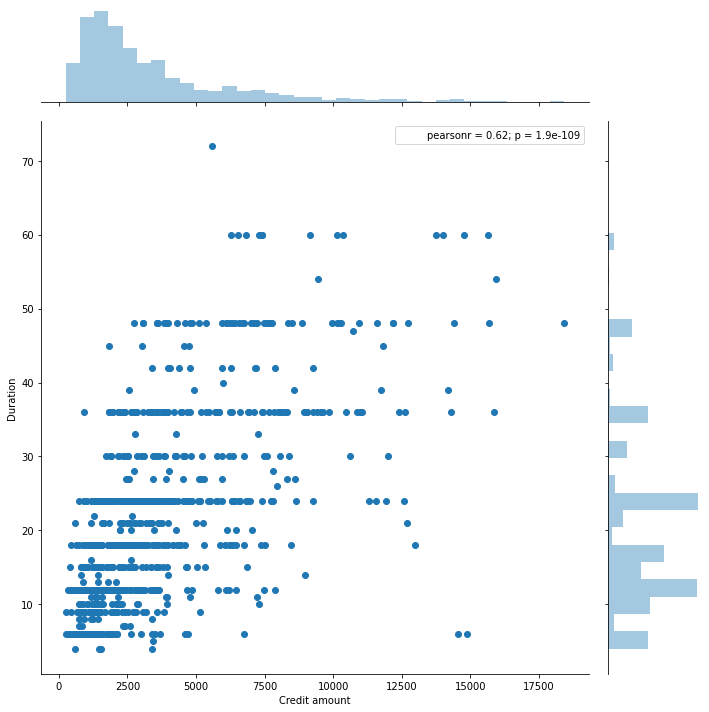

In [22]:
#线性相关性分析：Credit amount and Duration
'''
sns.jointplot()参数说明：
x, y： strings or vectors，Data or names of variables in data.
data：DataFrame, optional
kind：{ “scatter” | “reg” | “resid” | “kde”核密度估计 | “hex” }, optional
stat_func：callable or None, optional
Deprecated
color：matplotlib color, optional
height：numeric, optional
ratio：numeric, optional，Ratio of joint axes height to marginal axes height.
space：numeric, optional， Space between the joint and marginal axes
dropna：bool, optional，If True, remove observations that are missing from x and y.

'''

import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=data, kind="scatter", height=10)
r1.annotate(stats.pearsonr)
plt.show()

上图中的Pearson相关系数值：0.62 


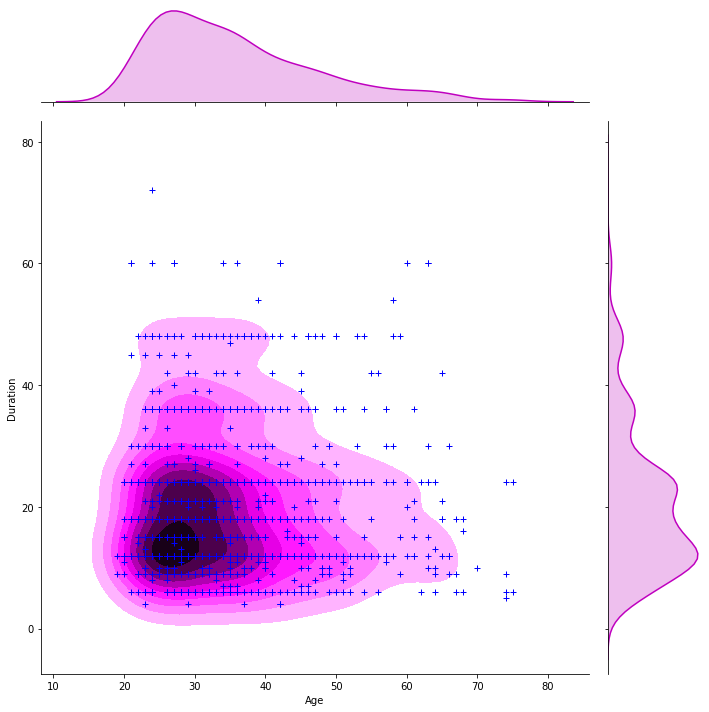

In [20]:
r1 = sns.jointplot(x="Age",y="Duration", data=data, kind="kde", height=10,color='m')
r1.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+")
r1.ax_joint.collections[0].set_alpha(0)
r1.set_axis_labels("Age", "Duration");

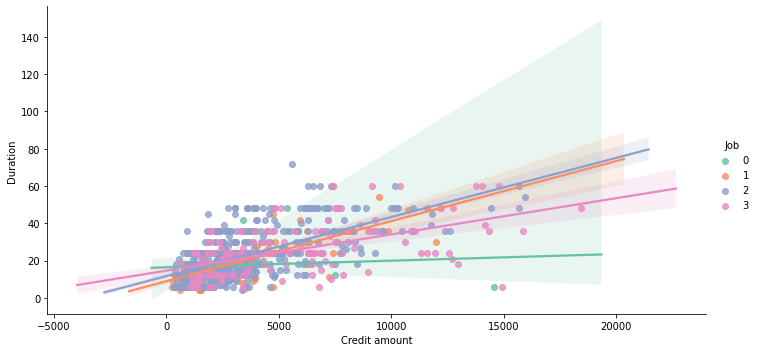

In [26]:
'''
lmplot是一种集合基础绘图与基于数据建立回归模型的绘图方法。
利用'hue'、'col'、'row'参数来控制绘图变量。
使用模型参数来调节需要拟合的模型：order、logistic、lowess、robust、logx。
参数：
hue, col, row : strings #定义数据子集的变量，并在不同的图像子集中绘制
size : scalar, optional #定义子图的高度
markers : matplotlib marker code or list of marker codes, optional #定义散点的图标
col_wrap : int, optional #设置每行子图数量
order : int, optional #多项式回归，设定指数
logistic : bool, optional #逻辑回归
logx : bool, optional #转化为log(x)
'''
sns.lmplot(x="Credit amount",y="Duration", hue="Job", data=data, palette="Set2", aspect=2)
plt.show()

结论：从性别上看，差别不明显

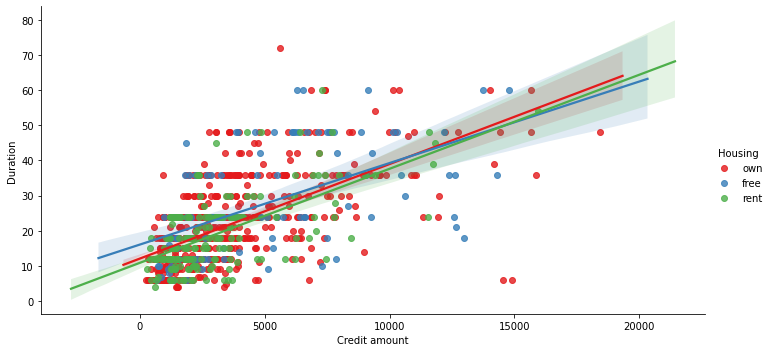

In [33]:
#对比查看住房的影响
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=data, palette="Set1", aspect=2)
plt.show()

结论：住房的差别也不明显

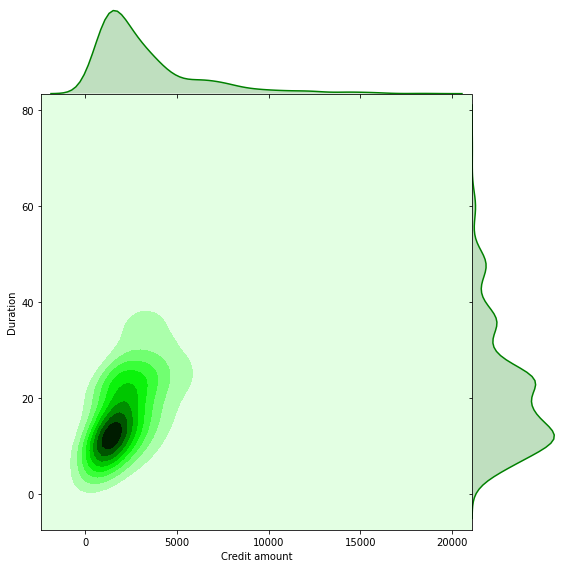

In [34]:
#商业分析
sns.jointplot("Credit amount","Duration", data=data, kind="kde", space=0, color="g",  height=8)
plt.show()

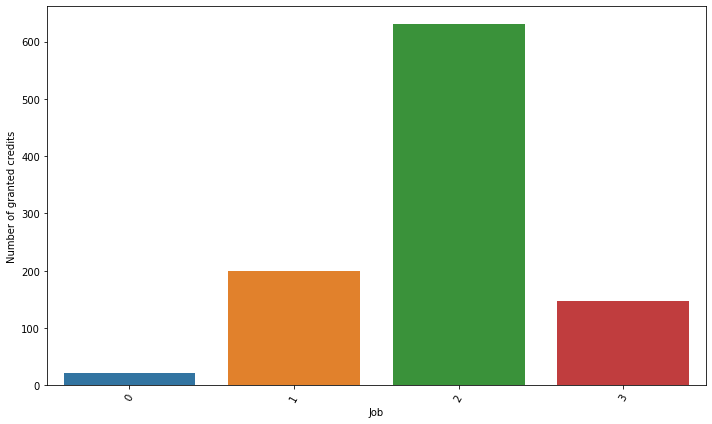

In [27]:
#按照刷卡用途分析
n_credits = data.groupby("Job")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Job",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

主要用于： car、radio/TV

In [39]:
#箱图可视化方法
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

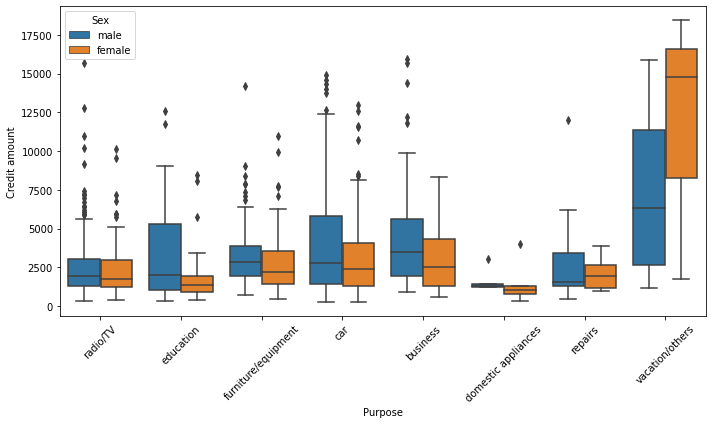

In [40]:
boxes("Purpose","Credit amount","Sex")

最多支出：vacations/others

最少支出：domestic appliances

男女差别不大，除了在vacation/others，当然这一类别总授信数量较少，置信度较低

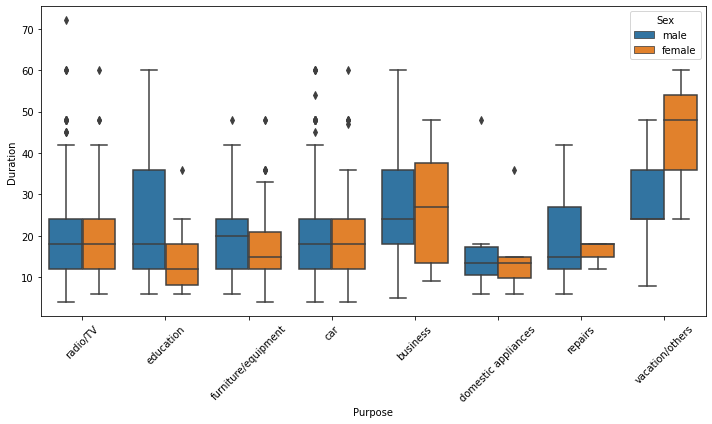

In [41]:
boxes("Purpose","Duration","Sex")

按性别看差别不大

Domestic appliances的Duration较短

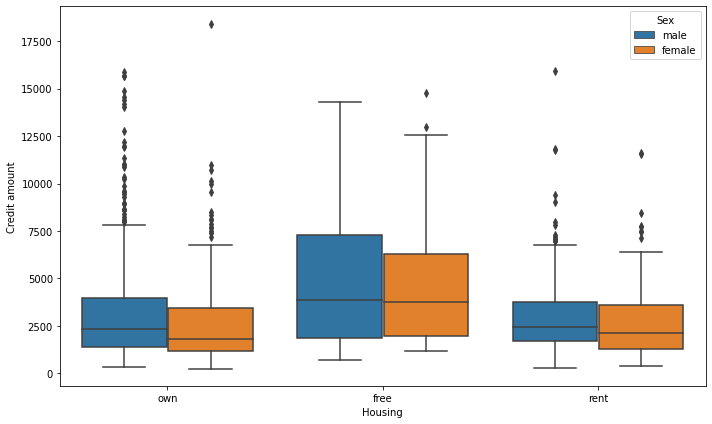

In [43]:
boxes("Housing","Credit amount","Sex",r=0)

结论：无房者的刷卡金额较高

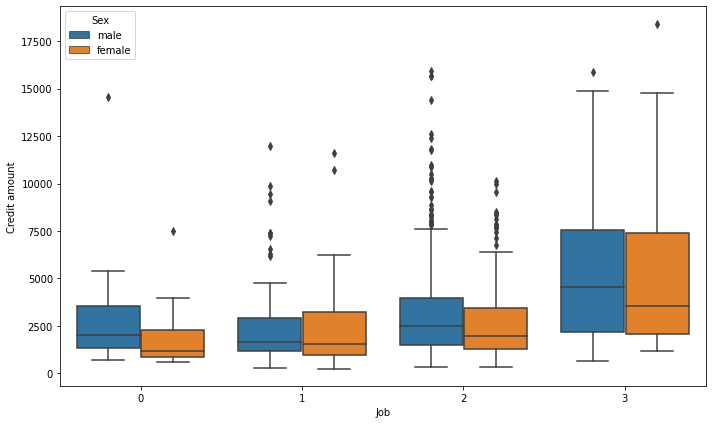

In [44]:
'''
Job:
1 : unemployed/ unskilled - non-resident 
2 : unskilled - resident 
3 : skilled employee / official 
4 : management/ self-employed/highly qualified employee/ officer 
'''

boxes("Job","Credit amount","Sex",r=0)

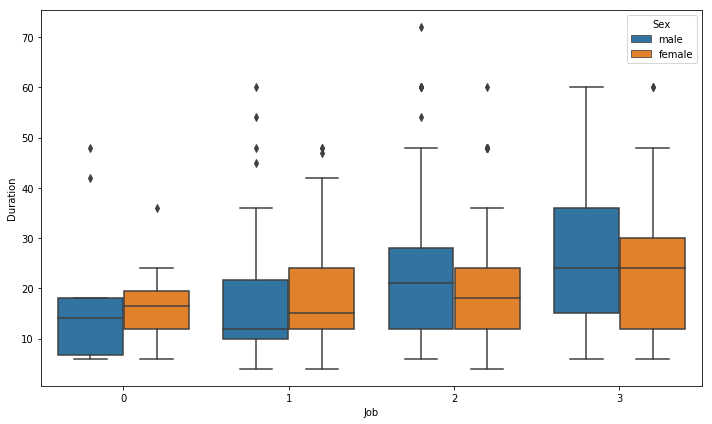

In [19]:
boxes("Job","Duration","Sex",r=0)

结论：第3类职业的金额更大，周期更长

Text(0.5, 0, 'Age')

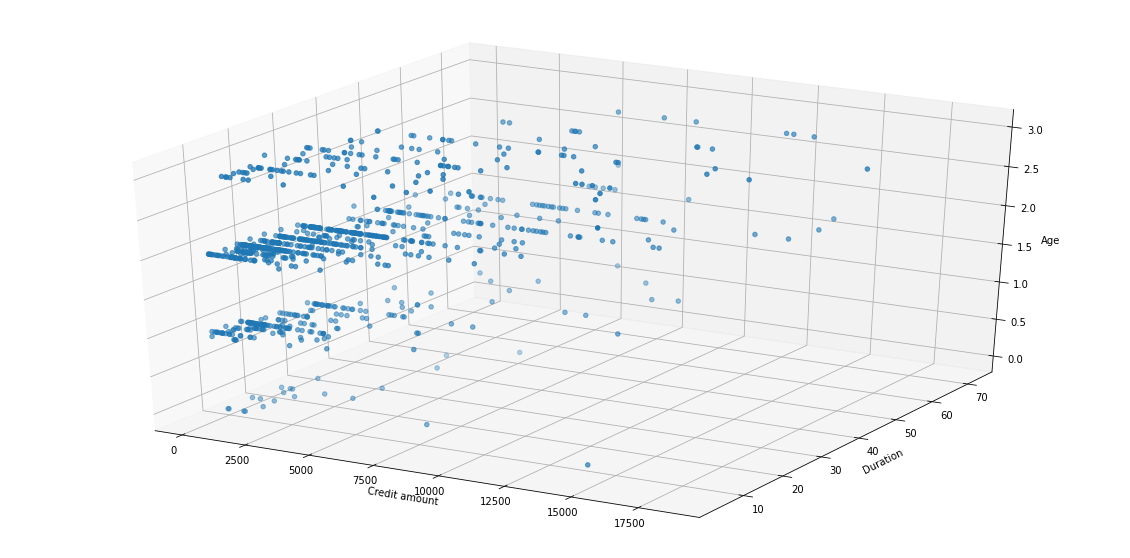

In [28]:
#3维散点图可视化
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Job"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

**三、KMeans聚类**

输入变量：Age, Credit amount, Duration 

In [31]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = data.loc[:,selected_cols]

In [32]:
#直方图显示方法
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

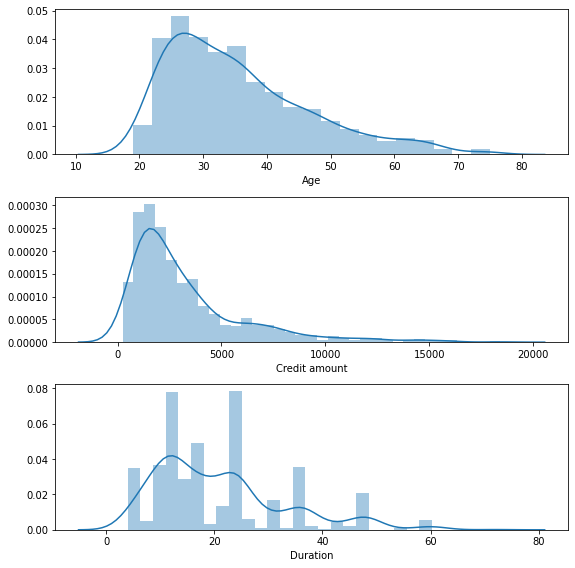

In [33]:
distributions(cluster_data)

数据分布情况是偏正态分布，需要进行对数变换（logarithmic）处理

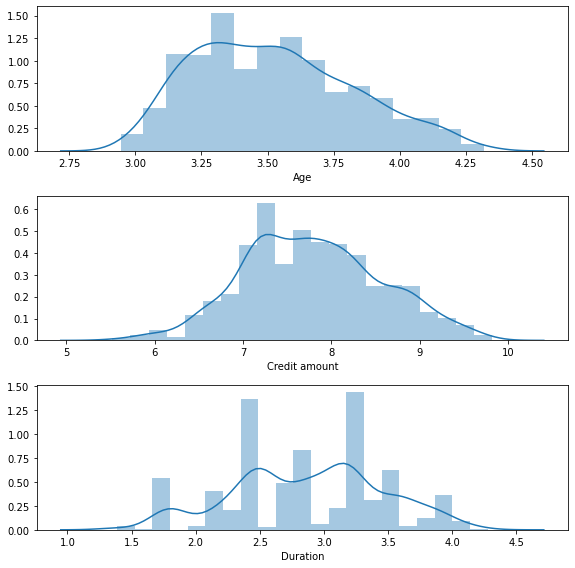

In [34]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

In [35]:
#归一化处理数值
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

尝试多个聚类数量：

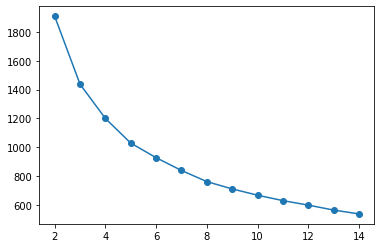

In [36]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)#每个点到其簇的质心的距离之和

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

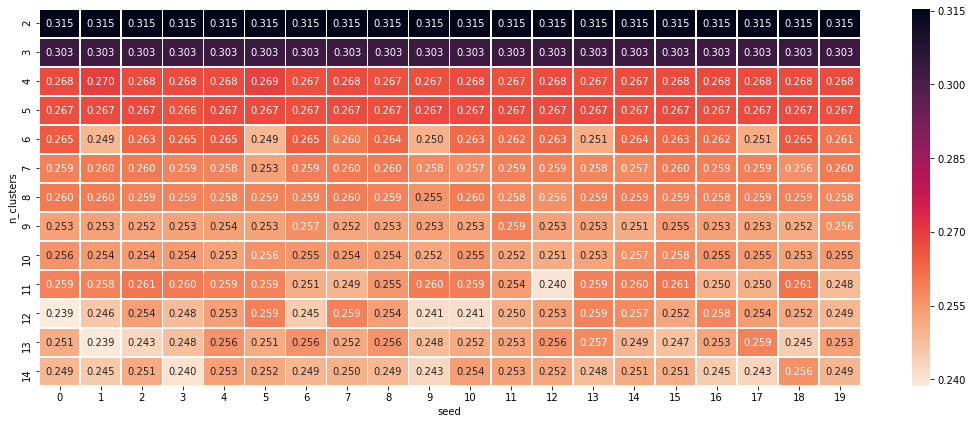

In [43]:
#计算聚类的轮廓系数值并使用热力图可视化
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

结论：3个类效果最佳

In [44]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [45]:
cluster_data

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [46]:
clustered_data

,Age,Credit amount,Duration,Cluster
0,67,1169,6,0
1,22,5951,48,1
2,49,2096,12,0
3,45,7882,42,1
4,53,4870,24,1
...,...,...,...,...
995,31,1736,12,2
996,40,3857,30,1
997,38,804,12,0
998,23,1845,45,1


聚类轮廓可视化

For n_clusters = 3  and seed = 1 
The average silhouette_score is : 0.302902483090709


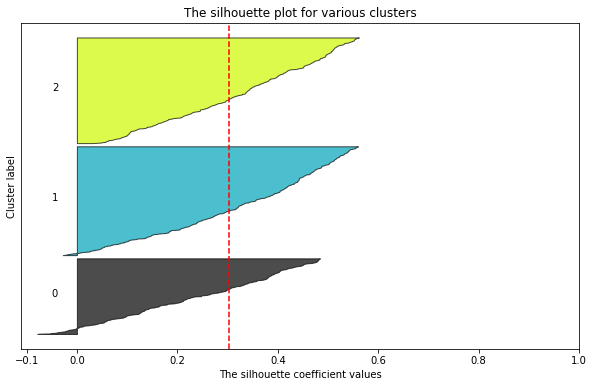

In [47]:
import matplotlib.cm as cm
random_state=1
clusterer = KMeans(n_clusters=3, random_state=random_state)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 3," and seed =", random_state,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

以散点图形式显示聚类结果

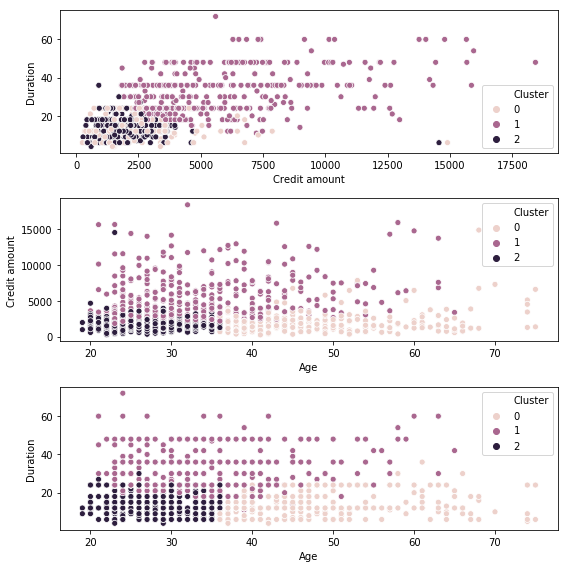

In [30]:
scatters(clustered_data, 'Cluster')

In [31]:
#计算类内均值
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,48.6,1970.5,13.9
1,34.0,5665.4,32.2
2,27.7,1737.5,14.3


Cluster 0 –  lower mean of credit amount, short duration, older customers

Cluster 1 – high mean of credit amount, long duration, middle-aged customers

Cluster 2 - lower mean of credit amount, short duration, young customers

**近邻传播聚类算法(AP聚类)**


特点: 不需要人工指定类数量

函数参数：

    damping : float, optional, default: 0.5,阻尼系数

    max_iter : int, optional, default: 200,最大迭代次数

    convergence_iter : int, optional, default: 15,在停止收敛的估计集群数量上没有变化的迭代次数

    copy : boolean, optional, default: True,布尔值,可选,即允许对输入数据的复制

    preference : array-like, shape (n_samples,) or float, optional,近似数组,每个点的偏好 - 具有较大偏好值的点更可能被选为聚类的中心点。 簇的数量，即集群的数量受输入偏好值的影响。 如果该项未作为参数，则选择输入相似度的中位数作为偏好

    affinity : string, optional, default=``euclidean``目前支持计算预欧几里得距离。 即点之间的负平方欧氏距离。

    verbose : boolean, optional, default: False

参考：https://www.biaodianfu.com/affinity-propagation.html

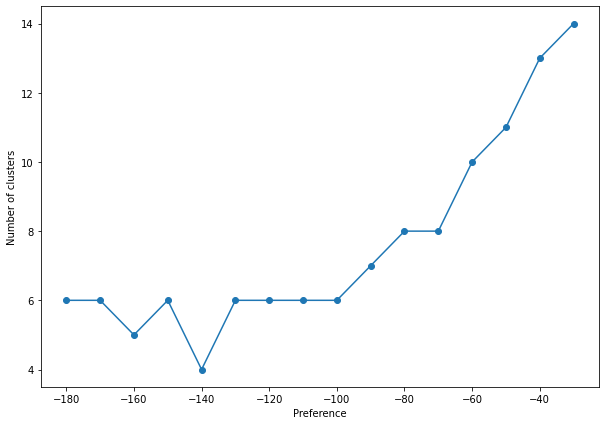

In [62]:
preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')


Together with decreasing value of preference parameter number of clusters goes down as well and levels for very small preference values. I will check four clusters option. 

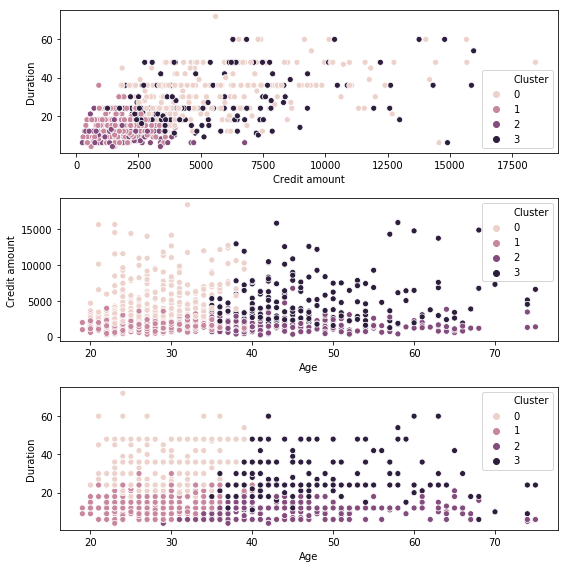

In [33]:
af = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(cluster_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = cluster_data.assign(Cluster=labels_af)
scatters(clustered_data_af,'Cluster')

grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)


In [34]:
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af

,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6


Cluster 0 – high mean of credit amount, long duration, younger customers

Cluster 1 – low mean of credit amount, short duration, younger customers

Cluster 2 - low mean of credit amount, short duration, older customers

Cluster 3 - high mean of credit amount, middle-time duration, older customers